In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from utils import ALL_LETTERS,N_LETTERS
from utils import load_data,letter_to_tensor,line_to_tensor,random_training_example

In [16]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(RNN,self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size+hidden_size,hidden_size)
        self.i2o = nn.Linear(input_size+hidden_size,output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    def forward(self,input_tensor,hidden_tensor):
        combined = torch.cat((input_tensor,hidden_tensor),1)

        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)

        return output , hidden

    def init_hidden(self):
        return torch.zeros(1,self.hidden_size)



In [17]:
category_lines,all_categories = load_data()
n_categories = len(all_categories)

In [18]:
n_categories

18

In [19]:
n_hidden = 128
rnn = RNN(N_LETTERS,n_hidden,n_categories)


In [20]:
input_tensor = letter_to_tensor("A")
hidden_tensor = rnn.init_hidden()

In [21]:
output,next_hidden = rnn(input_tensor,hidden_tensor)
output.size()
next_hidden.size()

torch.Size([1, 128])

In [22]:
input_tensor = line_to_tensor("Albert")
hidden_tensor = rnn.init_hidden()
output,next_hidden = rnn(input_tensor[0],hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [23]:
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

In [24]:
print(category_from_output(output))

Arabic


In [25]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(),lr=learning_rate)
def train(line_tensor,category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output,hidden = rnn(line_tensor[i],hidden)
    loss = criterion(output,category_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return output,loss.item()



In [27]:
current_loss = 0
all_losses = []
plot_steps,print_steps = 1000,5000
n_iters = 100000

    
for i in range(n_iters):
    category,line,category_tensor,line_tensor = random_training_example(category_lines,all_categories)
    output,loss = train(line_tensor,category_tensor)
    current_loss+=loss

    if (i+1)%plot_steps == 0:
        all_losses.append(current_loss/plot_steps)
        current_loss = 0
    if (i+1) % print_steps ==0:
        guess = category_from_output(output)
        correct = "correct" if guess == category else f"wrong {category}"
        print(f"{i} {i/n_iters*100} {loss:.4f} {line} / {guess} {correct}")


4999 4.999 2.4562 Vizhonsky / Greek wrong Russian
9999 9.998999999999999 2.2492 Cabrera / Dutch wrong Spanish
14999 14.999 1.2601 Ho / Vietnamese correct
19999 19.999 1.9134 Milano / Japanese wrong Italian
24999 24.999 1.9201 Campos / Greek wrong Portuguese
29999 29.999 2.9745 Soukup / Arabic wrong Czech
34999 34.999 1.7397 Mcdonald / Irish wrong Scottish
39999 39.999 0.5701 Shaw / Chinese correct
44999 44.999 0.1792 Mcmillan / Scottish correct
49999 49.999 2.7809 Brinkerhoff / Russian wrong German
54999 54.998999999999995 2.1586 Amato / Japanese wrong Italian
59999 59.999 0.2109 Monahan / Irish correct
64999 64.999 1.3712 Chong / Chinese wrong Korean
69999 69.999 0.3145 Sumitimo / Japanese correct
74999 74.99900000000001 1.2333 Paterson / Russian wrong Scottish
79999 79.999 2.3886 Cameron / Irish wrong Scottish
84999 84.999 1.4411 Parma / Spanish wrong Italian
89999 89.999 1.3468 Palomer / French correct
94999 94.999 0.0013 Takishita / Japanese correct
99999 99.99900000000001 0.9316 a

<Figure size 640x480 with 0 Axes>

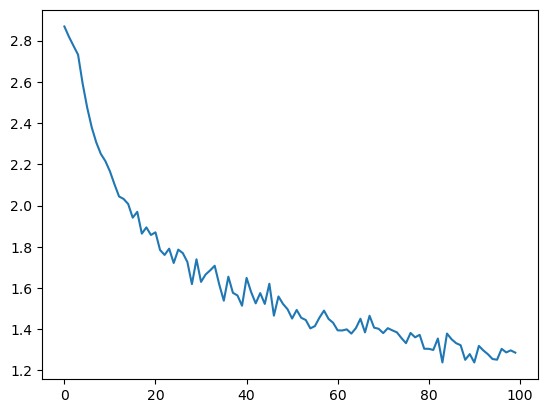

In [30]:
plt.plot(all_losses)

In [35]:
def predict(input_line):
    print(f"\n > {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        hidden = rnn.init_hidden()
    
        for i in range(line_tensor.size()[0]):
            output,hidden = rnn(line_tensor[i],hidden)
        loss = criterion(output,category_tensor)
        quess = category_from_output(output)
        print(quess)
    

In [36]:
while True:
    sentence = input("input")
    if sentence == "quit":
        break
    predict(sentence)
        

input quit
